# Weather API 


 objective is to build a series of scatter plots to showcase the following relationships:
 * Temperature (F) vs. Latitude
 * Humidity (%) vs. Latitude
 * Cloudiness (%) vs. Latitude
 * Wind Speed (mph) vs. Latitude
 
Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.


In [19]:
# Dependaries
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import numpy as np
from citipy import citipy 
from functools import reduce
import datetime

In [20]:

# use API keys from weather ApI, 
#use random function to generate lat long to get 1000s cities around the worls in true random mannar
#to avoid human bias

from key import api_key


In [21]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [22]:
# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
#query_url

In [23]:
#randomly generate 1000 citylat,long around the world 
lats = np.random.uniform(low=-90.000, high=90.000, size=1000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1000)
city = citipy.nearest_city(lats[0], lngs[0])

def getCity(a, x):
    a.append(citipy.nearest_city(x[0], x[1]))
    return a
cities = reduce(getCity, zip(lats, lngs), [])
weather_data = []
chart= pd.DataFrame({"CityNames": [x.city_name for x in cities], "Country Code": [x.country_code for x in cities]})
chart.head(2)

,CityNames,Country Code
0,taolanaro,mg
1,isangel,vu


In [24]:
City= chart.CityNames.tolist()
#City

In [25]:
for city in City:
    response = req.get(query_url + city)
    if response.status_code == 200:
        weather_data.append(response.json())

In [26]:
#call information we need for plotting 
lon_data=[data.get("coord").get("lon") for data in weather_data]
lat_data=[data.get("coord").get("lat") for data in weather_data]
city_data=[data.get("name") for data in weather_data]
date_data=[data.get("dt") for data in weather_data]
country_data=[data.get("sys").get("country") for data in weather_data]
pressure_data=[data.get("main").get("pressure") for data in weather_data]
Temperature_data=[data.get("main").get("temp_max") for data in weather_data]
Humidity_data=[data.get("main").get("humidity") for data in weather_data]
Cloudiness_data=[data.get("clouds").get("all") for data in weather_data]
WindSpeed_data=[data.get("wind").get("speed") for data in weather_data]

weather_data = {"City": city_data, "Country": country_data,"Date":date_data, "lat": lat_data,"lon": lon_data, "Temperature_max":Temperature_data,"Humidity":Humidity_data,"Wind": WindSpeed_data,"Cloud":Cloudiness_data,"Pressure": pressure_data}
weather_data = pd.DataFrame(weather_data)


In [29]:
weather_data.head(4)

,City,Cloud,Country,Date,Humidity,Pressure,Temperature_max,Wind,lat,lon
0,Amparihy,75,MG,1511028000,83,1017.00,23.0,1.00,-25.02,46.97
1,Isangel,12,VU,1511029513,100,1021.34,23.1,3.46,-19.55,169.27
2,Albany,90,US,1511027640,44,1006.00,7.0,6.70,42.65,-73.76
3,Rudnik,24,RU,1511029513,73,1010.72,-14.4,2.56,69.75,61.65


In [30]:
#check to see we still have at least #500 after dropping locations not found
weather_data.count()

City               936
Cloud              936
Country            936
Date               936
Humidity           936
Pressure           936
Temperature_max    936
Wind               936
lat                936
lon                936
dtype: int64

In [31]:
#save data to csv file
weather_data.to_csv("weatherdata.csv")

In [32]:
#datetime
d = datetime.datetime.now()
plot_date = '/'.join(str(x) for x in (d.month, d.day, d.year))
print(plot_date)

11/18/2017


# Temperature (C) vs. Latitude Plot

C:\Users\tania\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


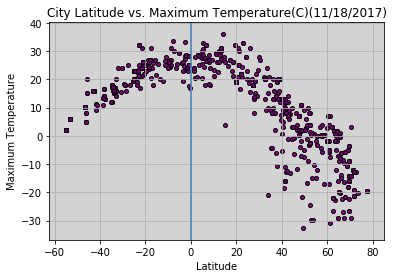

In [36]:
#scatterplots
# Temperature vs. Latitude
myplot = plt.scatter(weather_data["lat"], weather_data["Temperature_max"], marker="o", facecolors="purple",edgecolors="black", s=15, alpha=0.75)

plt.scatter(weather_data["lat"], weather_data["Temperature_max"], marker="o", facecolors="purple", edgecolors="black", s=15, alpha=0.75)
plt.axvline(0, color='steelblue', label = "Equator")
plt.grid()
plt.title(f"City Latitude vs. Maximum Temperature(C)({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
#plt.set_axis_bgcolor("lightgray")
plt.savefig("LatvMaxTemp.png")
axes = plt.axes()
axes.set_axis_bgcolor("lightgrey")
plt.show()

# Latitude vs Humidity Plot

C:\Users\tania\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  # This is added back by InteractiveShellApp.init_path()


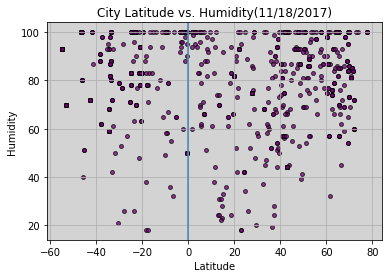

In [37]:
#scatterplots
# Humidity vs. Latitude
myplot = plt.scatter(weather_data["lat"], weather_data["Humidity"], marker="o", facecolors="purple", edgecolors="black", s=15, alpha=0.75)
plt.axvline(0, color='steelblue', label = "Equator")
plt.grid()
plt.title(f"City Latitude vs. Humidity({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("LatvHumidity.png")
axes = plt.axes()
axes.set_axis_bgcolor("lightgrey")
plt.show()

# Latitude vs. Cloudiness Plot

C:\Users\tania\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  # This is added back by InteractiveShellApp.init_path()


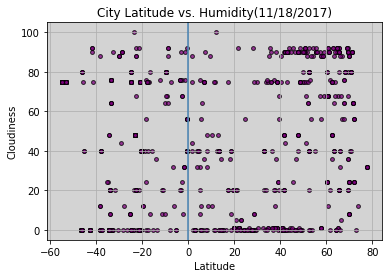

In [38]:
#scatterplots
# Humidity vs. Latitude
myplot = plt.scatter(weather_data["lat"], weather_data["Cloud"], marker="o", facecolors="purple", edgecolors="black", s=15, alpha=0.75)
plt.axvline(0, color='steelblue', label = "Equator")
plt.grid()
plt.title(f"City Latitude vs. Humidity({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("LatvsCloudiness.png")
axes = plt.axes()
axes.set_axis_bgcolor("lightgrey")
plt.show()

# Latitude vs. Wind Speed Plot


C:\Users\tania\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  # This is added back by InteractiveShellApp.init_path()


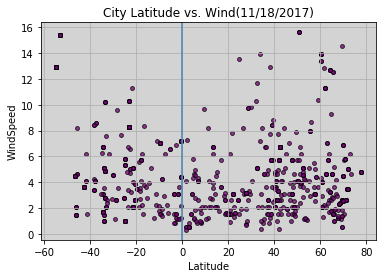

In [39]:
#scatterplots
# Hwindspeed vs. Latitude
myplot = plt.scatter(weather_data["lat"], weather_data["Wind"], marker="o", facecolors="purple", edgecolors="black", s=15, alpha=0.75)
plt.axvline(0, color='steelblue', label = "Equator")
plt.grid()
plt.title(f"City Latitude vs. Wind({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.savefig("LatvsWind.png")
axes = plt.axes()
axes.set_axis_bgcolor("lightgrey")
plt.show()

In [ ]:
#end of code

# observation 
temperature is maximum in near equatorial area, it decreses as the latitude increases, 
humidity and clodiness has no correlation with latitude. Wind speed is a bit lower in eq